In [253]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from tqdm import tqdm 
import glob

C:\Users\scanimage\AppData\Local\Temp\ipykernel_5432\919602113.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [254]:
data_directory = r'F:\\JJM\\miniscope_analysis\\clustering_analysis\\all_frames_2023-02-20-16-51-10_analysisOutput\\'

In [255]:
#'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2', #'GRIN018_H16_M13_S53'
session_list = ['GRIN013_H13_M33_S54', 'GRIN026_H16_M35_S34', 'GRIN027_H13_M29_S44', 
               'GRIN032_H16_M49_S22', 'GRIN032_H17_M30_S22', 
               'GRIN033_H13_M42_S33', 'GRIN033_H14_M34_S32', 
               'GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34',
               'GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53', 
               'GRIN009_H13_M59_S14', 'GRIN011_H10_M19_S59', 
               'GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17', 
               'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53',
               'GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40',
               'GRIN041_H12_M54_S49'] ;

In [256]:
#signalPeaks = pd.read_csv(data_directory+session+'_signalPeaks.csv')

In [257]:
def getEventRateForAnimals(signalPeaks):
    cell_dict = {}
    for cell in range(0, signalPeaks.shape[0]):
        #calculate event rates for each cell
        cell_peaks = np.where(signalPeaks.loc[cell]==1)[0]
        event_rate = np.zeros(signalPeaks.shape[1]-5)
        #sampling rate is 5Hz so 5 samples is 1 sec 
        for sIdx in range(0, signalPeaks.shape[1]-5):
            windowIdxs = (sIdx, sIdx+5)
            num_peaks = ((windowIdxs[0] < cell_peaks) & (cell_peaks < windowIdxs[1])).sum()
            event_rate[sIdx] = num_peaks
        cell_dict[cell] = event_rate
    eventRatePerCell_ = pd.DataFrame(cell_dict)
    eventRatePerCell = eventRatePerCell_.transpose()    
    return(eventRatePerCell)

In [258]:
sessionDfsDict = {}
for session in tqdm(session_list):
    signalPeaksSession = pd.read_csv(data_directory+session+'_signalPeaks.csv')
    sessionEventRate = getEventRateForAnimals(signalPeaksSession)
    sessionDfsDict[session] = sessionEventRate

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [02:28<00:00,  6.46s/it]


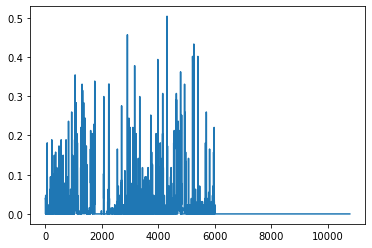

In [129]:
plt.plot(sessionDfsDict['GRIN032_H17_M30_S22'].mean(axis=0))

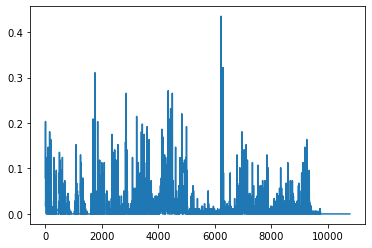

In [131]:
plt.plot(sessionDfsDict['GRIN038_H13_M37_S23'].mean(axis=0))

In [136]:
## bin by v bins
#get indicies corresponding to particular v bins
vBinFolder = r'F:\\JJM\\miniscope_analysis\\clustering_analysis\\frames_subset_Mon_20_Feb_2023_18_32_58'
vBinsBySession = {}
for session in session_list:
    ##use glob to fina all vbins for session
    vBinsForSession = glob.glob(vBinFolder+ r'\\*' + str(session) +  '*_velocityBin*.csv')
    vBinsBySession[session] = vBinsForSession

In [157]:
vBinsBySession['GRIN038_H13_M37_S23']

['F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin0.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin1.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin2.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin3.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin4.csv',
 'F:\\\\JJM\\\\miniscope_analysis\\\\clustering_analysis\\\\frames_subset_Mon_20_Feb_2023_18_32_58\\GRIN038_H13_M37_S23_velocityBin5.csv']

In [150]:
vbin_0 = pd.read_csv(vBinsBySession['GRIN038_H13_M37_S23'][0], usecols=['Indicies'])
vbin_3 = pd.read_csv(vBinsBySession['GRIN038_H13_M37_S23'][3], usecols=['Indicies'])

In [151]:
vbin_0['Indicies'].values

array([  46,   47,   48, ..., 9763, 9764, 9765], dtype=int64)

In [158]:
# access eventRatesPerCell using vBin indicies (these should match up as both are at 5Hz)
sessionDfsDict['GRIN038_H13_M37_S23'].mean(axis=0)[vbin_0['Indicies'].values].mean()

0.0026611753524473226

In [164]:
sessionDfsDict['GRIN038_H13_M37_S23'][vbin_0['Indicies'].values]
#.mean(axis=1).mean()

0.0026611753524473313

In [155]:
sessionDfsDict['GRIN038_H13_M37_S23'].mean(axis=0)[vbin_3['Indicies'].values].mean()

0.02814813028907612

In [193]:
## bin event rate by velocity
#extract indicies corresponding to v bins
#select regions of event rate trave corresponding to v bins 
vBinIndiciesBySession = {}
eventRatesByVbinBySession = {}
mean_eventRatesByVbinBySession = {}
for session in session_list: 
    vBinIndicies = {}
    eventRatesByVbin = {}
    mean_eventRatesByVbin = {}
    for vBinIdx in range(len(vBinsBySession[session])):
        #get v bin indicies from csv files
        vBinsIdxs = pd.read_csv(vBinsBySession[session][vBinIdx], usecols=['Indicies'])
        vBinIndicies[vBinIdx] = vBinsIdxs
        #select subsets of event rate df by v bin indicies 
        eventRatesByVbin[vBinIdx] = sessionDfsDict[session][vBinsIdxs['Indicies'].values]
        mean_eventRatesByVbin[vBinIdx] = sessionDfsDict[session][vBinsIdxs['Indicies'].values].mean(axis=1).mean()
        
    vBinIndiciesBySession[session] = vBinIndicies
    eventRatesByVbinBySession[session] = eventRatesByVbin
    mean_eventRatesByVbin[session] = mean_eventRatesByVbin
        
    
    
    

In [211]:
sessionMeansDfs = []
for session in session_list:
    sessionMeansDfs.append(pd.DataFrame([eventRatesByVbinBySession[session][vbinIdx].mean(axis=1).mean() for vbinIdx in list(eventRatesByVbinBySession[session].keys())], columns=[session]))
allSessionsMean = pd.concat(sessionMeansDfs, axis=1)

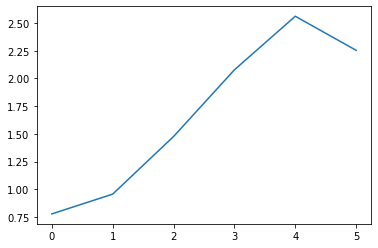

In [215]:
#plot means
plt.plot(allSessionsMean.mean(axis=1)*60)

In [216]:
## split data into WT and KO sessions
#'GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2', 
WT_sessions = ['GRIN013_H13_M33_S54', 'GRIN026_H16_M35_S34', 'GRIN027_H13_M29_S44', 
               'GRIN032_H16_M49_S22', 'GRIN032_H17_M30_S22', 
               'GRIN033_H13_M42_S33', 'GRIN033_H14_M34_S32', 

               'GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34',
               'GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53'] ; 
#'GRIN018_H16_M13_S53'
KO_sessions = ['GRIN009_H13_M59_S14', 'GRIN011_H10_M19_S59', 
               'GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17', 
               'GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53',
               'GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40',
               'GRIN041_H12_M54_S49'] ;

In [237]:
wt_by_mouse = {}
wt_by_mouse['GRIN013'] = allSessionsMean['GRIN013_H13_M33_S54']
wt_by_mouse['GRIN026'] = allSessionsMean['GRIN026_H16_M35_S34']
wt_by_mouse['GRIN027'] = allSessionsMean['GRIN027_H13_M29_S44']
wt_by_mouse['GRIN032'] = pd.DataFrame(allSessionsMean[['GRIN032_H16_M49_S22','GRIN032_H17_M30_S22']].mean(axis=1))
wt_by_mouse['GRIN033'] = pd.DataFrame(allSessionsMean[['GRIN033_H13_M42_S33','GRIN033_H14_M34_S32']].mean(axis=1))
#wt_by_day['GRIN034'] = pd.DataFrame(genotype_compiled.loc[['GRIN034_H16_M13_S22', 'GRIN034_H19_M0_S18', 'GRIN034_H15_M28_S2']].mean(axis=0)).transpose()
wt_by_mouse['GRIN035'] = pd.DataFrame(allSessionsMean[['GRIN035_H13_M31_S20', 'GRIN035_H13_M50_S58', 'GRIN035_H14_M40_S34']].mean(axis=1))
wt_by_mouse['GRIN039'] = pd.DataFrame(allSessionsMean[['GRIN039_H12_M26_S54', 'GRIN039_H12_M33_S29', 'GRIN039_H14_M8_S53']].mean(axis=1))

wt_by_mouse = pd.concat(wt_by_mouse.values(), keys=wt_by_mouse.keys(), axis=1)

#ko 
ko_by_mouse = {}
ko_by_mouse['GRIN009'] = allSessionsMean['GRIN009_H13_M59_S14']
ko_by_mouse['GRIN011'] = allSessionsMean['GRIN011_H10_M19_S59']
ko_by_mouse['GRIN012'] = pd.DataFrame(allSessionsMean[['GRIN012_H16_M57_S23', 'GRIN012_H17_M32_S17']].mean(axis=1)) 
ko_by_mouse['GRIN018'] = pd.DataFrame(allSessionsMean[['GRIN018_H17_M41_S43', 'GRIN018_H16_M13_S53' ]].mean(axis=1)) 
ko_by_mouse['GRIN038'] = pd.DataFrame(allSessionsMean[['GRIN038_H11_M57_S0', 'GRIN038_H13_M37_S23', 'GRIN038_H15_M39_S40' ]].mean(axis=1))
ko_by_mouse['GRIN041'] = allSessionsMean['GRIN041_H12_M54_S49']

ko_by_mouse = pd.concat(ko_by_mouse.values(), keys=ko_by_mouse.keys(), axis=1)

In [239]:
wt_by_mouse

,GRIN013,GRIN026,GRIN027,GRIN032,GRIN033,GRIN035,GRIN039
,GRIN013_H13_M33_S54,GRIN026_H16_M35_S34,GRIN027_H13_M29_S44,0,0,0,0
0,0.005242,0.012424,0.007475,0.014659,0.025346,0.022437,0.013674
1,0.011144,0.015019,0.013455,0.015670,0.023544,0.024675,0.014820
2,0.040430,0.048432,0.022304,0.023966,0.028768,0.024579,0.014296
3,0.050390,0.080474,0.032130,0.038931,0.040286,0.037591,0.013364
4,0.039788,0.068684,0.051650,0.063192,0.043847,0.062938,0.014000
5,0.094694,0.076062,0.064861,0.045984,0.038401,0.026091,0.007584


In [240]:
ko_by_mouse

,GRIN009,GRIN011,GRIN012,GRIN018,GRIN038,GRIN041
,GRIN009_H13_M59_S14,GRIN011_H10_M19_S59,0,0,0,GRIN041_H12_M54_S49
0,0.014499,0.005428,0.007909,0.018149,0.004240,0.000000
1,0.014847,0.008649,0.018810,0.024633,0.006030,0.001684
2,0.030404,0.034824,0.032308,0.027263,0.013224,0.008574
3,0.047389,0.054627,0.035924,0.028956,0.023913,0.018774
4,0.052185,0.070818,0.031329,0.036800,0.036660,0.007627
5,0.060839,0.034844,0.031512,0.023366,0.049713,0.012422


In [260]:
wt_by_mouse.to_csv(r'F:\\JJM\\miniscope_analysis\\clustering_analysis\\summary_figs\\eventrate_wt.csv')
ko_by_mouse.to_csv(r'F:\\JJM\\miniscope_analysis\\clustering_analysis\\summary_figs\\eventrate_ko.csv')

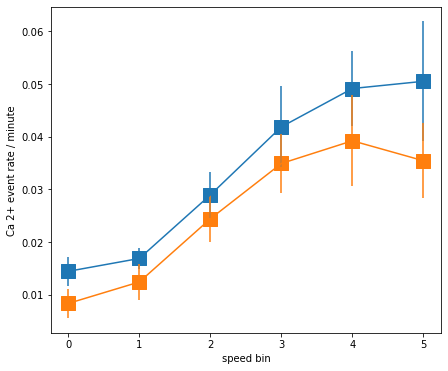

In [262]:
# event rate binned by velocity 
mean = wt_by_mouse.mean(axis=1)
mean_ko = ko_by_mouse.mean(axis=1)
std_error = wt_by_mouse.std(axis=1)/math.sqrt(7)
std_error_ko = ko_by_mouse.std(axis=1)/math.sqrt(6)

bin_vector = np.linspace(0, 5, 6)

plt.scatter(bin_vector, mean, s=200, marker='s')
plt.scatter(bin_vector, mean_ko, s=200,  marker='s')
plt.errorbar(bin_vector, mean, yerr=std_error)
plt.errorbar(bin_vector, mean_ko, yerr=std_error_ko)

ax = plt.gca()
ax.set_ylabel('Ca 2+ event rate / minute')
ax.set_xlabel('speed bin')

fig = plt.gcf()
fig.set_size_inches(7, 6)
fig.savefig(r'F:\JJM\miniscope_analysis\clustering_analysis\summary_figs\eventrate_dSPNs_by_mouse.pdf', transparent=True)

In [ ]:
# plot all events 